# Crisp-DM

The iterative Cross Industry Process for Data Mining (CRISP-DM) is visualized here:
<p align="center">
<img src="https://raw.githubusercontent.com/christiansimonis/crisp-dm/master/CRISP_DM.png" alt="CRISP-DM" style="width:60%; border:0;">
</p>

More information on CRISP-DM can be found here (no promotion!):
- https://www.datascience-pm.com/crisp-dm-2/
- https://www.ibm.com/docs/en/spss-modeler/saas?topic=dm-crisp-help-overview

# Business understanding

In this section it is important to:
- understand the first principles that contribute to your business problem.
- derive a realistic baseline for comparison or benchmarking purposes.
- elaborate an argumentation for your business understanding:
    - e.g. can you reduce costs?
    - e.g. can you create additional revenue?
    - e.g. can you increase profitability / cash flows?
    - e.g. can you improve strategical goals (customer access, data access, quality improvement ...)?
    - and quantify the value add.

#### Formulate a business hypothesis, that you are validating or invalidating in a data-driven way.   
    
Example: Let's assume the following hypothetical situation for illustration purposes.
We develop a method do quantify and solve a regression problem for the given data set.
The current baseline could be: 
- an available model (no promotion!):
    - e.g. this one: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py


#### Note: A more detailed value pool analysis will help. For the sake of simplicity of this tutorial, this aspect will not be discussed in detail.

It is recommended to validate or invalidate hypothesis consequently in a data-driven way. Also: It is OK to pivot!

# Business understanding

In this section it is important to understand:
- how the raw data looks like
- distribution of data
- dependencies within the data
- the data quality
    
    
Visualization is a powerful tool to gain business understanding. Let's start!

In [1]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets 
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.simplefilter("ignore")


#track execution time
t_start = time.time() 


# Load the dataset
diabetes = sklearn.datasets.load_diabetes()
Feature_values, Label = diabetes.data, diabetes.target
Features = pd.DataFrame(Feature_values, columns=diabetes.feature_names)


#Let's take a look at the features
Features.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


# Data Understanding: Visualization of Label
After taking a look at the table, now let's check the distribution of our label. The label is our target value, which we are going to predict later on. It's now important to check if the label distribution:
- has some outlier (if so, we should understand why and how to proceed with these outliers)
- fits our understanding our not
- check if there are areas where a deeper look would be required

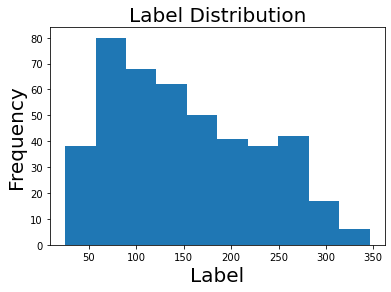

In [2]:
# Visualization: lets check our label
plt.hist(Label)
plt.xlabel('Label', fontsize=20)
plt.title('Label Distribution', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

# Data Understanding: Assessment of Label
in our case the label looks fine. In the hypothetical example, we would have couple of labels as outliers above 500 and we would know that this would represent a wrong measurement which should be removed, clipping would be a viable option. (Since in our case no label above 500 does exist, the next processing step, is not impactful but should just demonstrate one possible way for dealing with outliers):

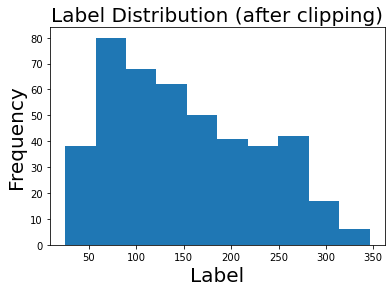

In [3]:
# optional: update Features X and Label, by clipping strange data points
th = 500 #threshold
y = Label[Label<th] #e.g. if some clipping would be needed 
X = Features[Label<th]

# Visualization
plt.hist(y)
plt.xlabel('Label', fontsize=20)
plt.title('Label Distribution (after clipping)', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

# Data Understanding: Visualization of Features and Label
Now let's check our feature matrix with respect to distribution and cross-dependencies as well how the correlate with the label. We also want to understand if some features have outliers and if the distribution fits our expectation.

In [4]:
# Put all data in one dataframe
Data = X.copy()   # Features
Data["Label"] = y # Label

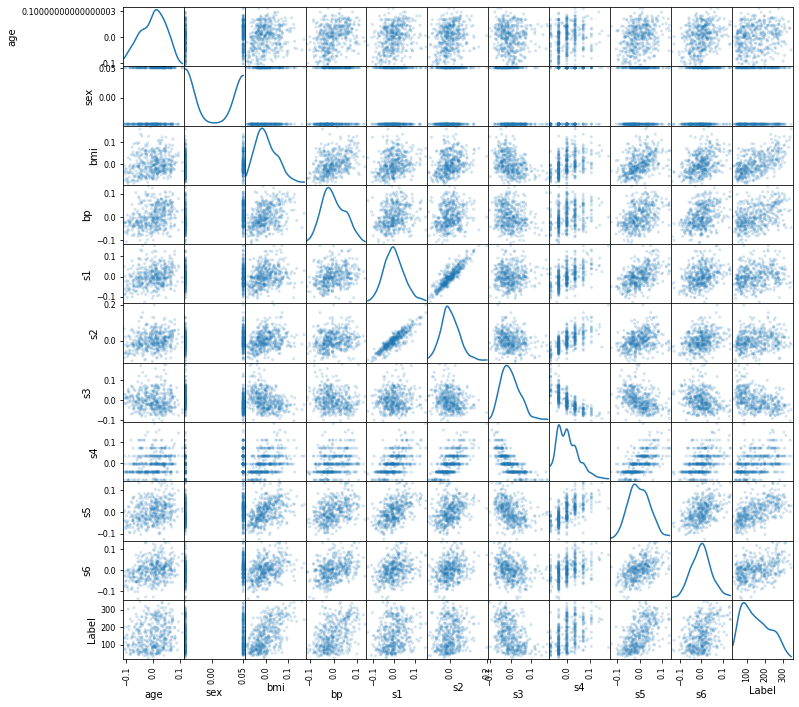

In [5]:
#Visualization of Data frame
pd.plotting.scatter_matrix(Data, alpha=0.2, figsize=(12, 12), diagonal = 'kde');

# Data Understanding: Assessment 
in our case the visualization looks fine. The second feature is extraordinary with respect to the distribution, but this can be explained due to the inherent characteristics of gender.

In [6]:
# Check data with some basic statistics for plausibility 
Data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Label
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


# Data Understanding: Quality check
Now let's do a quality check and see, if there are Not a Number values (NaNs) in the data set. Fortunately it's not the case here, but if it were, we could mitigate these by either simply deleting or filling them directly in the dataframe(no promotion!):
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

It is important that you use your domain and business knowledge which is dependent on your specific discpline to apply additional data quality checks. 

In [7]:
# Check data quality: Are there some NaNs?
Data.isna().any() # in this case: No - since always False.

age      False
sex      False
bmi      False
bp       False
s1       False
s2       False
s3       False
s4       False
s5       False
s6       False
Label    False
dtype: bool

# Data Preparation: Partitioning and Scaling 
Let's move to our next item in the CRISP DM model: Data preparation.
First, we split the data in a training and a testing set:
- training set: serves fitting our model
- test set: is not allowed to be seen by the model and serves just the final validation
- (it is recommended also to have a third set, e.g. called validation set to tune hyperparameters of the model.)

In every case, we need to make sure, that no information from the test set makes it implicitely or explicitely into our model development process!

Afterwards, we go on with scaling:
In order to make it easy for our Machine Learning model to derive information from the data to fit model parameters, we do not want to favor or discriminate any of our features. This is why we scale them to a comparable range. In this example, we go for MIN / MAX scaling. Other scaling appraoches are also possible, e.g. normalizing (z-transformation) which means you bring it to the standard normal distribution with $ \mu = 0 $ and $ \sigma = 1 $, see also (no promotion!):
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html


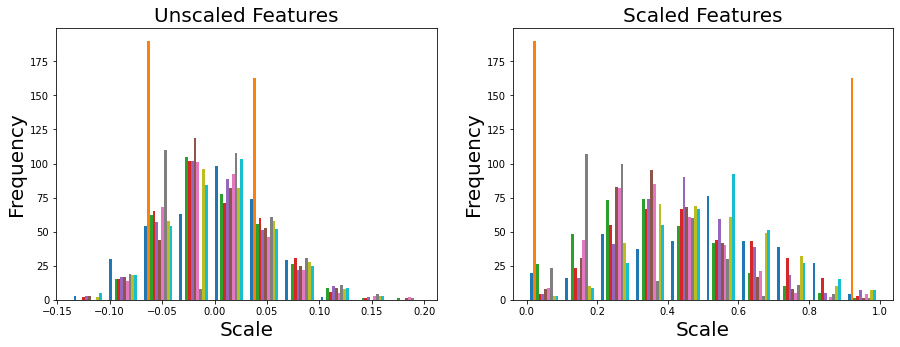

In [8]:
from sklearn.preprocessing import MinMaxScaler

#Conduct train test split
x_training, x_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=1) # since data is big, only 50% used as training data


# Prepare Training data
X_train = x_training.to_numpy()
Y_train = np.transpose([(y_training)])


# Process test data accordingly
X_test = x_testing.to_numpy()
Y_test = np.transpose([(y_testing)])

# Scale data
scaler = MinMaxScaler()
scaler.fit(X_train) # a good practice to use only training data for scaling purposes

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Visualization
fig, axs = plt.subplots(2, 2, figsize=(15, 5))
plt.subplot(121)
plt.hist(X_train)
plt.xlabel('Scale', fontsize=20)
plt.title('Unscaled Features', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.subplot(122)
plt.hist(X_train_scaled)
plt.xlabel('Scale', fontsize=20)
plt.title('Scaled Features', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

# Data Preparation: Feature Importance Analysis
In a next step, we want to check how important our scaled features are. We utilize a Random Forest Regressor to estimate the impact of each feature. The impact can be checked by how the model performance changes as the difference between a baseline metric and the metric from permutating the specific feature. In our regression example, we define the *explained variance* as relevant scoring metric.

More information can be found here (no promotion!):
- https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html


As we can see in our analysis, the feature *BMI* appears to have the most predictive power for our regression problem.
Based on feature importance, one can decide to remove features if they don't seem powerful enough. In our case, we just go ahead with the full feature space.

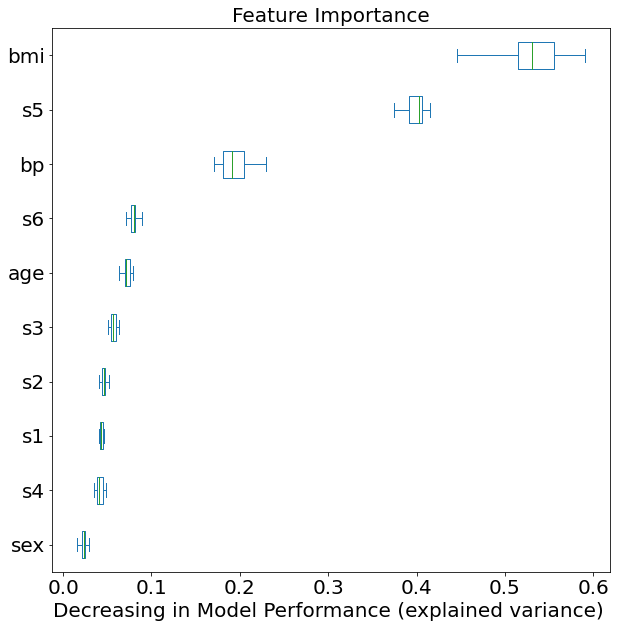

In [9]:
# Derive Feature Importance, using a Random Forest Regressor
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor

# Model Fit
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_scaled, Y_train) # using Train Data only as good practice

# Analysis and visualization of Importance as the decrease in accuracy
result = permutation_importance(rf, X_train_scaled, Y_train, n_repeats=10, scoring = 'explained_variance')
sorted_importances_idx = result.importances_mean.argsort()
ax = pd.DataFrame(result.importances[sorted_importances_idx].T, 
                  columns=X.columns[sorted_importances_idx]).plot.box(vert=False, whis=50, figsize=(10, 10), fontsize=20)
ax.set_title("Feature Importance", fontsize=20)
ax.set_xlabel("Decreasing in Model Performance (explained variance) ", fontsize=20);

# Data Preparation: Feature Engineering
This is your chance to incorporate your domain knowledge into features! Be creative and apply signal processing to derive meaningful characteristics that serve as model inputs!

In this example, we would not add additional features since we already have some relevant data in the data frame. 
In general, possible approaches for Feature Engineering are:
- simple mathematical operations on existing features (like multiplication, deriving ratios, ...)
- statistical features (like mean value or kurtosis, ...)
- signal processing (like fourier or wavelet transform to exploit information from the spectogram or frequency domain)
- ... and using models, that represent your domain knowledge

Useful information can be found here (no promotion!):
- https://developers.google.com/machine-learning/data-prep

Note: Feature Engineering is especially important for classic Machine Learning models. Deep Learning models try to solve this task implicitly with tons of learnable parameters (weights) as well as advanced model architectures like transformers, multi-head approaches or specific convolution/pooling layers. If you are interested in more details, I can recommend the Deep Learning Specialization from DeepLearning.AI, where I serve as Mentor (no promotion!):
- https://www.linkedin.com/posts/christiansimonis_edtech-ai-aiot-activity-6985299850573533184-G3JU


# Data Preparation: Information check
Let's check if we have redundancy in the features. We can do so with a Principle Component Analysis. Basically this method allows to check it the features are linear independent and how much of information (measured with variance) can be explained in case we would transform the data, projecting them into the space, which is spanned by the principal components of the data.

If you need more information, the Wikipedia article is not too bad (no promotion!):
- https://en.wikipedia.org/wiki/Principal_component_analysis

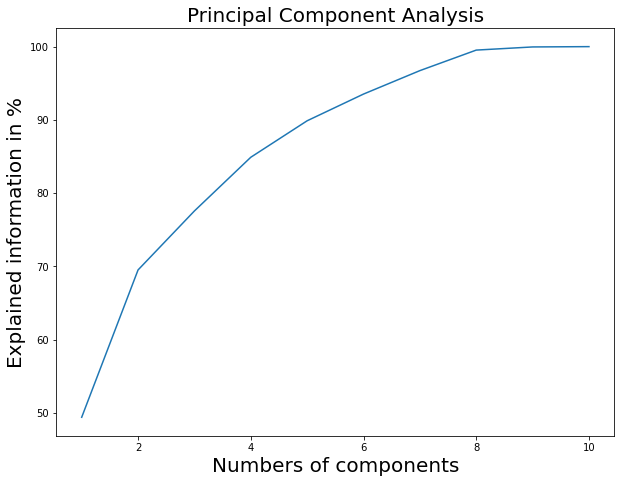

Cumulative information in %: 
[ 49.41537144  69.52283358  77.57267486  84.90035844  89.88028253
  93.52608524  96.7248537   99.52773462  99.95710522 100.        ]


In [10]:
# Analysis of feature dependencies: Do we have redundancy in our features?
from sklearn.decomposition import PCA
pca = PCA(svd_solver='full')
pca.fit(X_train_scaled)

#Number of features
nr_features = np.size(X_train_scaled,1)

fig, ax = plt.subplots(figsize=(10, 7.5))
plt.plot(np.linspace(1,nr_features,nr_features),np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Numbers of components', fontsize=20)
plt.title('Principal Component Analysis', fontsize=20)
plt.ylabel('Explained information in %', fontsize=20)
plt.show()

print("Cumulative information in %: ")
print(np.cumsum(pca.explained_variance_ratio_)*100)

# Data Preparation: Transformation
As we see is the explained information flattening out, the more features we have. 
E.g. 5 features in the projected principal component space seems to explain already ca. 90 % of all information. 8 Features would explain 99.5 % of all information. 

I always like to think about the ratio of available data to the feature space. Assuming a uniform distribution with 100 data points in one dimension seems quite OK to learn a nice relationship in a data-driven way. If you have two features, it's just 10 data points (10 x 10 = 100) in each direction. With three features, we would have 4.6 data points in one direction since $4.6^3 = 100 $ or with the dimension $n$, we could assume $\sqrt[n]{100}$ as an estimate of data points in the direction of one feature. Please note that this rule of thumb can serve as a rough estimate to get a sense of whether you have chosen a useful feature space given the amount of available data.

In order to avoid overfitting, we should make sure, that we have sufficient data, giving the chosen dimension.
In our case, we chose $n = 3$ as dimension and apply the transformation into the principal component space. Afterwards, we plot it, depicting training as well as test data:
- once before the dimension reduction
- once after the dimension reduction to $n = 3$ 

In [11]:
# Applying dimensional order reduction
X_train_sred = pca.transform(X_train_scaled) # scaled and reduced
X_test_sred = pca.transform(X_test_scaled) # scaled and reduced

# Let's go for 3 dimensions:
dim = 3
X_train_sred_dim = X_train_sred[:,0:dim]
X_test_sred_dim = X_test_sred[:,0:dim]


# Chosing a shorter name:
X_trn_pca = X_train_sred_dim
X_tst_pca = X_test_sred_dim
Y_trn = Y_train
Y_tst = Y_test

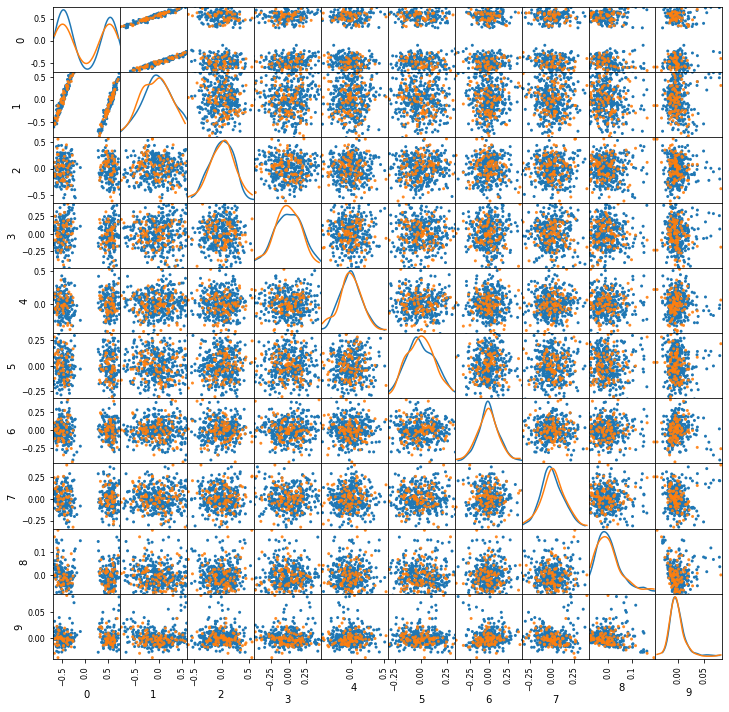

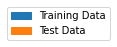

In [12]:
#Plotting all Principal Components
fig, ax = plt.subplots(nr_features, nr_features, figsize=(12, 12))
pd.plotting.scatter_matrix(pd.DataFrame(X_train_sred), alpha=1, diagonal = 'kde', ax = ax, label="training");
pd.plotting.scatter_matrix(pd.DataFrame(X_test_sred), alpha=0.9, diagonal = 'kde', ax = ax, label="test");

# Showing the color legend
pd.DataFrame({'Training Data':0, 'Test Data':0}, index=['N']).plot(kind='area', legend = 'true',figsize=(0, 0), alpha=1).axis('off');

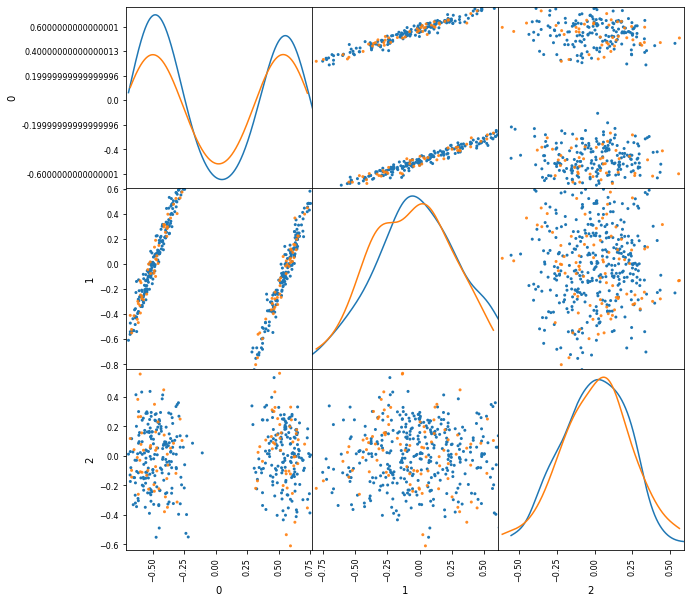

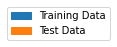

In [13]:
#Plotting only chosen PCs
fig, ax = plt.subplots(dim, dim, figsize=(10, 10))
pd.plotting.scatter_matrix(pd.DataFrame(X_trn_pca), alpha=1, diagonal = 'kde', ax = ax, label="training");
pd.plotting.scatter_matrix(pd.DataFrame(X_tst_pca), alpha=0.9, diagonal = 'kde', ax = ax, label="test");


# Showing the color legend
pd.DataFrame({'Training Data':0, 'Test Data':0}, index=['N']).plot(kind='area', legend = 'true',figsize=(0, 0), alpha=1).axis('off');

# Data Preparation: Transformation, considering the label
The previously executed Principal Component Analysis (PCA) does not take the label into account since it is just feature-based. 

We now condider also a Partial Least Square transformation (PLS). Similarily as the PCA, a transformation into a lower dimensional space can be achieved. 
However, in this kind of dimensionality reduction, we take the labels also into account! 
More information can be found here (no promotion!):
- https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html
- https://scikit-learn.org/stable/modules/cross_decomposition.html#cross-decomposition

We visualize the data after transformation and dimension reduction.

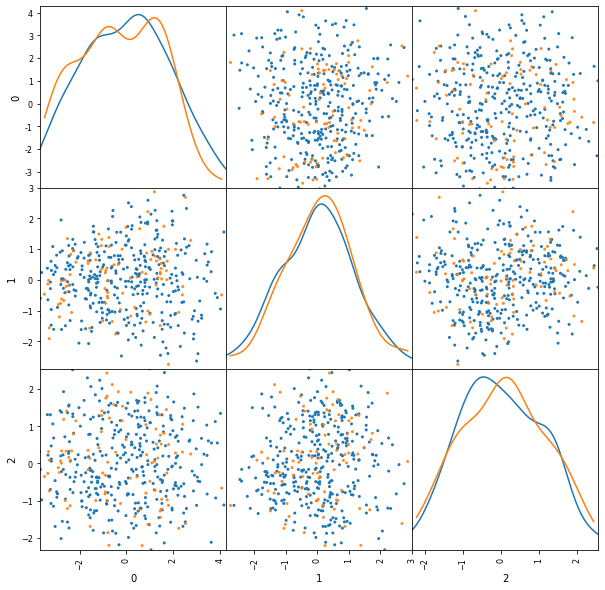

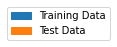

In [14]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=dim)
pls.fit(X_train_scaled, Y_trn)

# Transformation
X_trn_pls = pls.transform(X_train_scaled)
X_tst_pls = pls.transform(X_test_scaled)



# Plotting only chosen PLS, using the same dim(PCA)
fig, ax = plt.subplots(dim, dim, figsize=(10, 10))
pd.plotting.scatter_matrix(pd.DataFrame(X_trn_pls), alpha=1, diagonal = 'kde', ax = ax, label="training");
pd.plotting.scatter_matrix(pd.DataFrame(X_tst_pls), alpha=0.9, diagonal = 'kde', ax = ax, label="test");


# Showing the color legend
pd.DataFrame({'Training Data':0, 'Test Data':0}, index=['N']).plot(kind='area', legend = 'true',figsize=(0, 0), alpha=1).axis('off');

# Modelling: Preparing the model
Now let's move to the core part: Modelling.

In our case, we start defining a Kernel which we would use later on in a Gaussian Process (GP) Regression Model. The Kernel of the GP is a powerful way to incorporate additional domain knowledge (e.g. on periodicity or low-pass characteristics of your regression task) into the model.

In [15]:
import gpflow
from gpflow.utilities import print_summary

# Kernel:
kern_rbf = gpflow.kernels.RBF()
kern_noise =gpflow.kernels.White()
k = gpflow.kernels.Sum([kern_rbf, kern_noise]) # composite kernel


# Summary 
print_summary(k)

╒═════════════════════════════╤═══════════╤═════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                        │ class     │ transform   │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════════╪═══════════╪═════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ Sum.kernels[0].variance     │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
├─────────────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ Sum.kernels[0].lengthscales │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
├─────────────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ Sum.kernels[1].variance     │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
╘═════════════════════════════╧═══════════╧═════════════╧═════════╧═════════════╧═════════╧═════════╧═══

# Modelling: Defining the model
Let's define the model. In our case we want to go for a Gaussian Process (GP), utilizing the preciously defined kernel.
For an excellent explanation of a Gaussian process model and the math behind it, see Richard Turner's video (no promotion!):
- https://www.youtube.com/watch?v=92-98SYOdlY&t=848s

After the definition, we take a look at the model summary and check which parameters are going to be trained in the next step.

In [16]:
# Model definition
model_pca = gpflow.models.GPR(data=(X_trn_pca, Y_trn), kernel=k, mean_function=None)
print_summary(model_pca)

╒════════════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                               │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │   value │
╞════════════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ GPR.kernel.kernels[0].variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │       1 │
├────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.kernels[0].lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │       1 │
├────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.kernels[1].variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │       1 │
├───────

# Modelling: Fitting the model (using PCA data)
Now the actual training will take place. We define the maximum iterations here exemplarily with 100. Please consider, that dependent on your data set, this step can take very long. In our example this should just take a couple of seconds.

In [17]:
# Training
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model_pca.training_loss, model_pca.trainable_variables, options=dict(maxiter=100))
print_summary(model_pca)

╒════════════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════════╕
│ name                               │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │       value │
╞════════════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════════╡
│ GPR.kernel.kernels[0].variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 26885.9     │
├────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────────┤
│ GPR.kernel.kernels[0].lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │     1.38534 │
├────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────────┤
│ GPR.kernel.kernels[1].variance     │ Parameter │ Softplus         │         │ True        │ ()      │ 

# Modelling: Fitting the model (using PLS data)
After defining the model accordingly, the actual training will take place, similarily as we did previously. However, in this case, we use the PLS data from the transformation step which we did before. Please take into account, that dependent on your data set, this step can take very long. In our example this should just take a couple of seconds.

In [18]:
# Definition
model_pls = gpflow.models.GPR(data=(X_trn_pls, Y_trn), kernel=k, mean_function=None)
print_summary(model_pls)


# Training
optgp = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(model_pls.training_loss, model_pls.trainable_variables, options=dict(maxiter=100))
print_summary(model_pls)

╒════════════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════════╕
│ name                               │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │       value │
╞════════════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════════╡
│ GPR.kernel.kernels[0].variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 26885.9     │
├────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────────┤
│ GPR.kernel.kernels[0].lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │     1.38534 │
├────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────────┤
│ GPR.kernel.kernels[1].variance     │ Parameter │ Softplus         │         │ True        │ ()      │ 

# Evaluation: Prediction of Test data
We use our fitted model to generate predictions for:
- our training data (which we used for fitting in the previous step)
- our test data (which were never been seen by the model before)

In [19]:
# Predict mean and variance with Gaussian Process (GP)

#PCA Data:
mean_trn_pca, var_trn_pca = model_pca.predict_f(X_trn_pca)
mean_tst_pca, var_tst_pca = model_pca.predict_f(X_tst_pca)


#PLS Data:
mean_trn_pls, var_trn_pls = model_pls.predict_f(X_trn_pls)
mean_tst_pls, var_tst_pls = model_pls.predict_f(X_tst_pls)

# Evaluation: Visualization of the results (PCA data)
We now visualize the results and derive a scatter plot. In a perfect world, both training and test set prediction would lie on a straight line, meaning they would match perfectly with the actual label.

We also check the residual plots for both, training and test set. It can be used to analyze the model performance. We also want to make sure, that the part which cannot be explained by the model (= the residuum) is preferably normally distributed and does not contain certain systematics. (In case, we could exploit additional systematic information, we would have to model this in our features as long until eventually the residuum is normally distributed or sufficiently close to it).

In our case, we can see that the model is not overfitting too much. We see this on both:
- the scatter plot
- the residual plots

since in both cases, it becomes apparent, that the training performance is quite in a comparable range as the test performance. We also plot the first principal component against the labels and the model with $\pm 1 \sigma$ uncertainties to get a feeling how the model is performing with respect to noise, uncertainty and over- or underfitting tendencies. The model looks ok so far and a performance of $\pm 150$ seems to be reasonable.

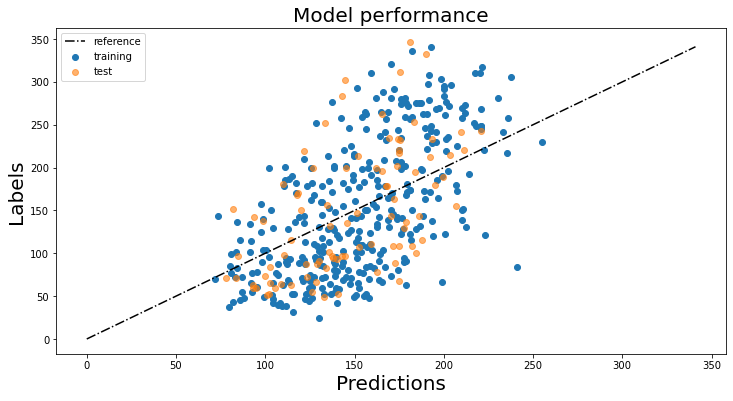

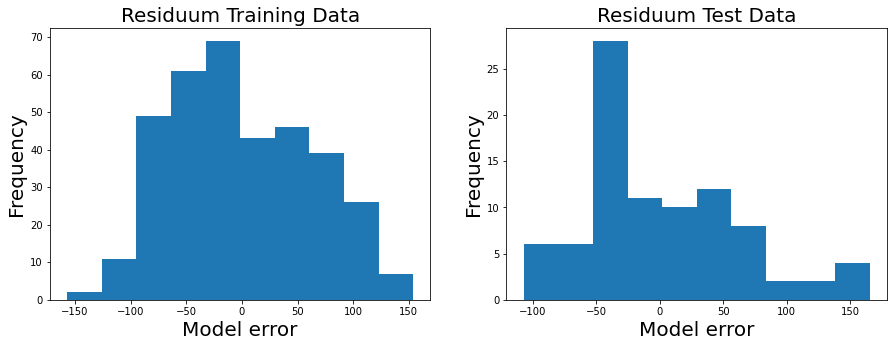

In [20]:
# plot label scatters
plt.figure(figsize=(12, 6))
plt.plot([0,np.max(Y_trn)],[0, np.max(Y_trn)], 'k-.',label = "reference")
plt.scatter(mean_trn_pca, Y_trn, label = "training")
plt.scatter(mean_tst_pca, Y_tst , label = "test", alpha = 0.6)
plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Labels', fontsize=20)
plt.title('Model performance', fontsize=20)
plt.legend()
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
plt.hist(Y_trn - mean_trn_pca.numpy())
plt.xlabel('Model error', fontsize=20)
plt.title('Residuum Training Data', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.subplot(122)
plt.hist(Y_tst - mean_tst_pca.numpy())
plt.xlabel('Model error', fontsize=20)
plt.title('Residuum Test Data', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

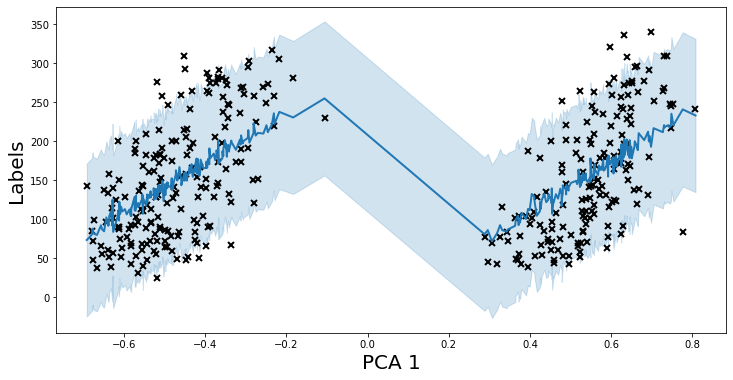

In [21]:
sort_index = np.argsort(X_trn_pca[:,0])


# Visualization
plt.figure(figsize=(12, 6))
plt.plot(X_trn_pca[sort_index][:,0], Y_trn[sort_index], "kx", mew=2)
plt.plot(X_trn_pca[sort_index][:,0], np.array(mean_trn_pca)[sort_index], "C0", lw=2)
plt.fill_between(
    X_trn_pca[sort_index][:,0],
    np.array(mean_trn_pca)[sort_index][:, 0] - 1.96 * np.sqrt(np.array(var_trn_pca)[sort_index][:, 0]),
    np.array(mean_trn_pca)[sort_index][:, 0] + 1.96 * np.sqrt(np.array(var_trn_pca)[sort_index][:, 0]),
    color="C0",
    alpha=0.2)
plt.xlabel('PCA 1', fontsize=20)
plt.ylabel('Labels', fontsize=20);

# Evaluation: Visualization of the results (PLS data)
Now let's visualize the PLS data, too. We will compare it lateron against our PCA results. Visualizing the first principal component with label and model uncertainty showed quite some gap between -0.2 and 0.2. 

In case of the PLS data, we will see here a more closed data space without this significant gap below when it comes to the PLS data. The reason is, that here label information are already incorporated into the projection of features.

We also plot the first PLS components against the labels and the model with $\pm 1 \sigma$ uncertainties to get a feeling how the model is performing with respect to noise, uncertainty and over- or underfitting tendencies. The model looks ok so far and a performance of $\pm 150$ seems to be reasonable, considering that there are additional dimensiong, which we can plot lateron.

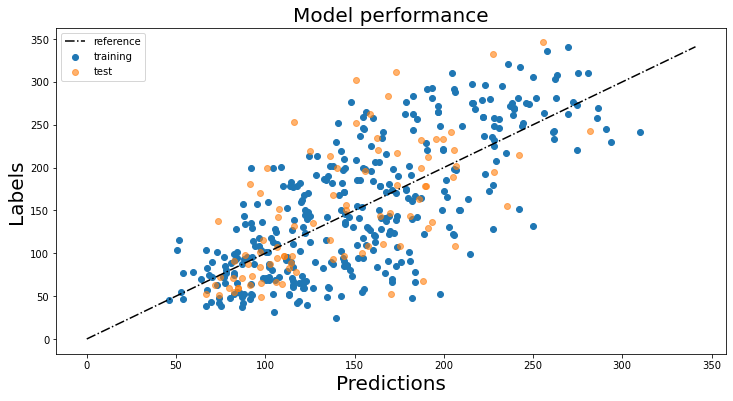

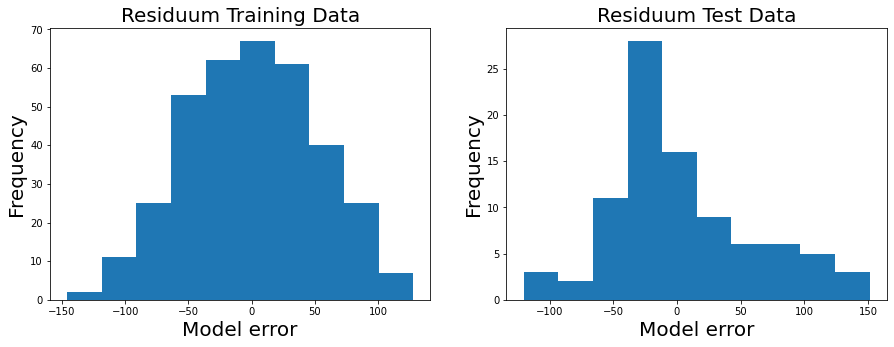

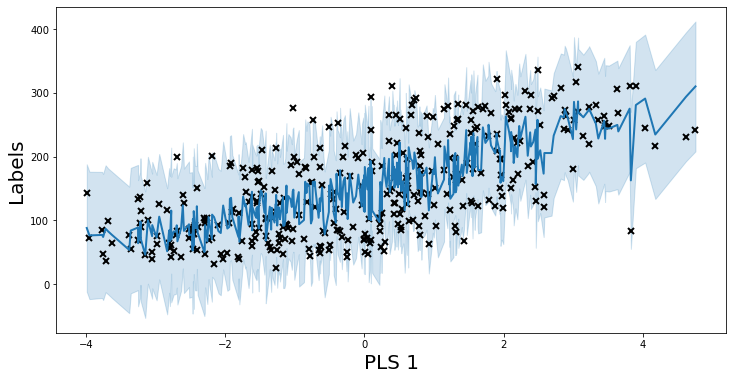

In [22]:
plt.figure(figsize=(12, 6))
plt.plot([0,np.max(Y_trn)],[0, np.max(Y_trn)], 'k-.',label = "reference")
plt.scatter(mean_trn_pls, Y_trn, label = "training")
plt.scatter(mean_tst_pls, Y_tst , label = "test", alpha = 0.6)
plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Labels', fontsize=20)
plt.title('Model performance', fontsize=20)
plt.legend()
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
plt.hist(Y_trn - mean_trn_pls.numpy())
plt.xlabel('Model error', fontsize=20)
plt.title('Residuum Training Data', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.subplot(122)
plt.hist(Y_tst - mean_tst_pls.numpy())
plt.xlabel('Model error', fontsize=20)
plt.title('Residuum Test Data', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()


sort_index = np.argsort(X_trn_pls[:,0]);

# Visualization:
plt.figure(figsize=(12, 6))
plt.plot(X_trn_pls[sort_index][:,0], Y_trn[sort_index], "kx", mew=2)
plt.plot(X_trn_pls[sort_index][:,0], np.array(mean_trn_pls)[sort_index], "C0", lw=2)

plt.fill_between(
    X_trn_pls[sort_index][:,0],
    np.array(mean_trn_pls)[sort_index][:, 0] - 1.96 * np.sqrt(np.array(var_trn_pls)[sort_index][:, 0]),
    np.array(mean_trn_pls)[sort_index][:, 0] + 1.96 * np.sqrt(np.array(var_trn_pls)[sort_index][:, 0]),
    color="C0",
    alpha=0.2)
plt.xlabel('PLS 1', fontsize=20)
plt.ylabel('Labels', fontsize=20);

# Evaluation: Residual Analysis (PCA Data)
Now, we analyze the residuals accordingly. We would like to see normally distributed residua without any correlation to features or remaning systematics (see also our assessment criteria below for PLS data).

In [23]:
# Training Data
df_trn_pca = pd.DataFrame(X_trn_pca)
df_trn_pca['res'] = Y_trn - mean_trn_pca.numpy()

# Test Data
df_tst_pca = pd.DataFrame(X_tst_pca)
df_tst_pca['res'] = Y_tst - mean_tst_pca.numpy()

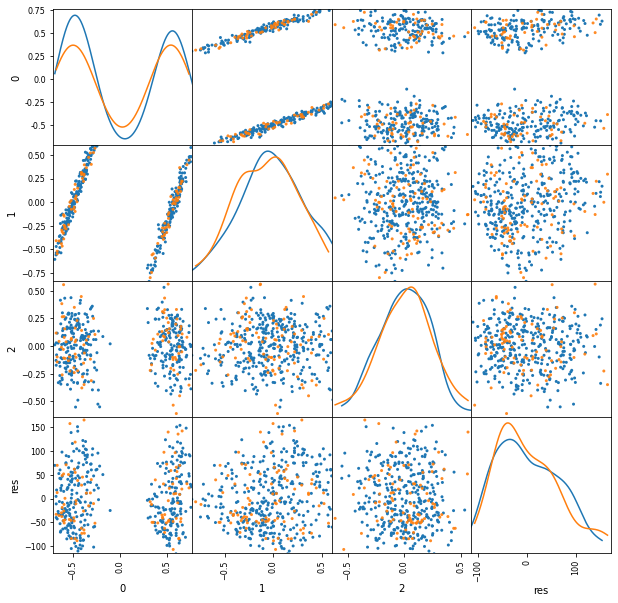

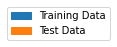

In [24]:
# Plotting the Residua with Features: The last row is of interest!
fig, ax = plt.subplots(dim+1, dim+1, figsize=(10, 10))
pd.plotting.scatter_matrix(df_trn_pca, alpha=1, diagonal = 'kde', ax = ax, label="training");
pd.plotting.scatter_matrix(df_tst_pca, alpha=0.9, diagonal = 'kde', ax = ax, label="test");


# Showing the color legend
pd.DataFrame({'Training Data':0, 'Test Data':0}, index=['N']).plot(kind='area', legend = 'true',figsize=(0, 0), alpha=1).axis('off');

# Evaluation: Residual Analysis (PLS Data)
Now, we analyze the PLS residuals, too. We would like to obtain normally distributed residua without any correlation to features: 

<p align="center">
<img src="https://raw.githubusercontent.com/christiansimonis/crisp-dm/master/Residuals.png" alt="Residuals" style="width:60%; border:0;">
</p>

We note, that theres seems to be some systematic bias in the test residuals. Considering our business understanding, we have to judge whether or not this is acceptable. Let's assume this would be fine (for both, PLS as well as PCA data). Then we can proceed!

In [25]:
# Training Data
df_trn_pls = pd.DataFrame(X_trn_pls)
df_trn_pls['res'] = Y_trn - mean_trn_pls.numpy()

# Test Data
df_tst_pls = pd.DataFrame(X_tst_pls)
df_tst_pls['res'] = Y_tst - mean_tst_pls.numpy()

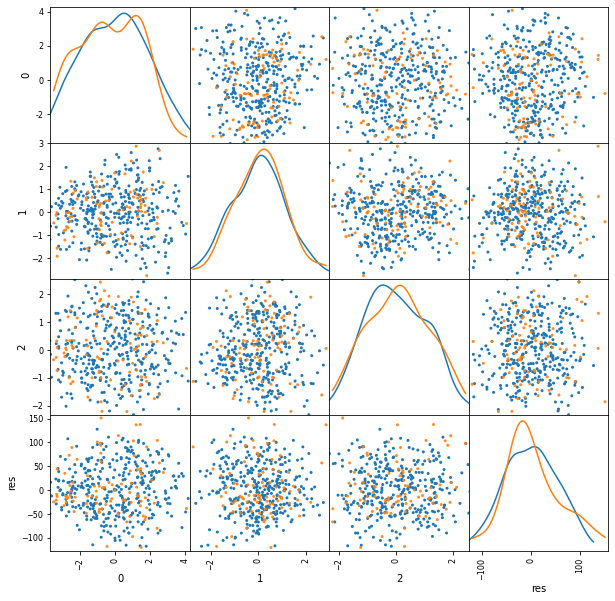

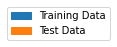

In [26]:
#Plotting the Residua with Features: The last columns, resp. the last row is of interest!
fig, ax = plt.subplots(dim+1, dim+1, figsize=(10, 10))
pd.plotting.scatter_matrix(df_trn_pls, alpha=1, diagonal = 'kde', ax = ax, label="training");
pd.plotting.scatter_matrix(df_tst_pls, alpha=0.9, diagonal = 'kde', ax = ax, label="test");


# Showing the color legend
pd.DataFrame({'Training Data':0, 'Test Data':0}, index=['N']).plot(kind='area', legend = 'true',figsize=(0, 0), alpha=1).axis('off');

# Evaluation: Visualizing the model predictions (PLS Data)
Let's assume, our favourite model pipeline emerges from the PLS data and we would consider deploying it.
So, we would create an exemplary input as meshgrid which could be a potential input space to our model. We would visualize the first two dimensions and how the models looks behaves in this space, considering:
- labels, visualized with a scatterplot:
    - as training data
    - as test data
- the model point estimations $\mu$
- including model uncertainties, characterized with the standard deviation $\sigma $:
    - $\mu + 1 \sigma $
    - $\mu - 1 \sigma $

(In general, we could do exactly the same for the PCA data, too. Feel free to try it out!)

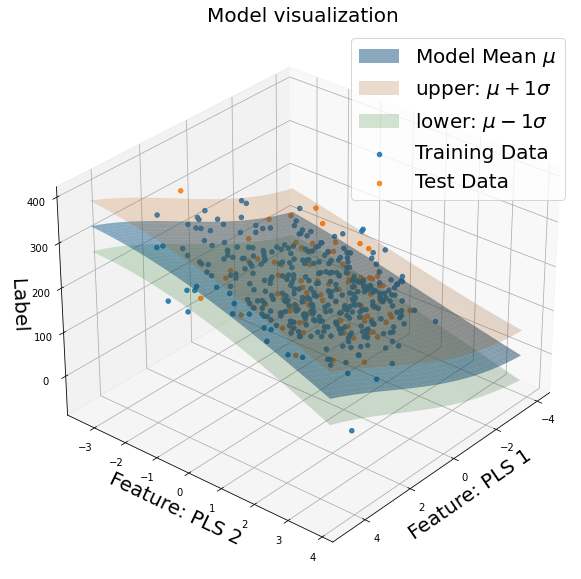

In [27]:
# create a meshgrid for characterizing the model input
xx, yy = np.meshgrid(np.linspace(np.min(X_trn_pls[:,0]), np.max(X_trn_pls[:,0]), 100), 
                         np.linspace(np.min(X_trn_pls[:,1]), np.max(X_trn_pls[:,1]), 100))

# input for model
inp = np.zeros((len(xx)*len(xx), dim)) 
inp[:,0] = xx.reshape(-1,1)[:,0]
inp[:,1] = yy.reshape(-1,1)[:,0]


#Create predictions
mean_pls_viz, var_pls_viz = model_pls.predict_f(inp)


# plot the model and training / test data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111,projection='3d')
surf= ax.plot_surface(xx, yy, np.array(mean_pls_viz).reshape(100,100), alpha=0.5, label = 'Model Mean $\mu$')
surf_u= ax.plot_surface(xx, yy, np.array(mean_pls_viz + np.sqrt(var_pls_viz)).reshape(100,100), alpha=0.2, label = 'upper: $\mu + 1 \sigma $')
surf_l= ax.plot_surface(xx, yy, np.array(mean_pls_viz - np.sqrt(var_pls_viz)).reshape(100,100), alpha=0.2, label = 'lower: $\mu - 1 \sigma $')
surf._facecolors2d = surf._facecolor3d
surf._edgecolors2d = surf._edgecolor3d
surf_u._facecolors2d = surf_u._facecolor3d
surf_u._edgecolors2d = surf_u._edgecolor3d
surf_l._facecolors2d = surf_l._facecolor3d
surf_l._edgecolors2d = surf_l._edgecolor3d
ax.scatter(X_trn_pls[:,0], X_trn_pls[:,1],Y_trn, label = 'Training Data', alpha=0.9)
ax.scatter(X_tst_pls[:,0], X_tst_pls[:,1],Y_tst, label = 'Test Data', alpha=0.9)
plt.xlabel('Feature: PLS 1', fontsize=20)
plt.ylabel('Feature: PLS 2', fontsize=20)
ax.set_zlabel('Label', fontsize=20)
plt.title('Model visualization', fontsize=20)
ax.view_init(30, 40)
plt.legend(fontsize=20)
plt.show()

In [28]:
#Print Execution time
t_end = time.time()
print(t_end - t_start)

32.093441009521484


# Deployment
There are several ways, how to finally deploy your model. Possibilities include:
- Cloud deployment
- Mobile / Edge device / Embedded deployment
- and in general also others IT or AIoT infrastructures.

More information can be found here (no promotion!):
- https://www.tensorflow.org/lite

The technology and solution architecture plays an important role, as does the labeling strategy in the field, which allows you to train your model along the iterative Crisp-DM cycle. Please remember that re-training allows you to incorporate new information and new insights into your model. You can make this knowledge effective by deploying the model and running it for your business purpose:
<p align="center">
<img src="https://raw.githubusercontent.com/christiansimonis/crisp-dm/master/CRISP_DM.png" alt="CRISP-DM" style="width:60%; border:0;">
</p>


Wanna stay in contact?
Let's connect (no promotion!):
- https://www.linkedin.com/in/christiansimonis/